In [1]:
import PIL.Image as pi
from PIL import Image
from math import sqrt
import numpy as np

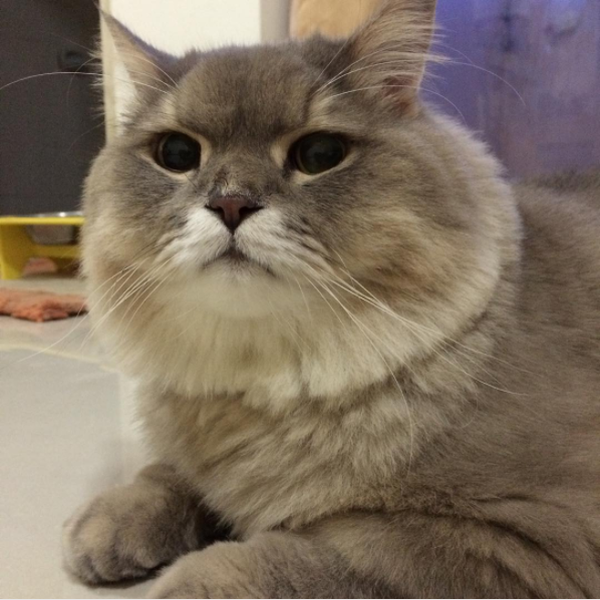

In [8]:
img = Image.open('bonebone.png')
img = img.convert('RGB')
# Округляем размеры исходного изображения
resized_img = img.resize((600, 600), Image.ANTIALIAS)
resized_img.save('bonebone.png')
# Переводим img в array
m = np.asarray(img)
# матрица для преобразования 
haar = np.array([[1/2,1/2],[-1/2, 1/2]])
img

In [3]:
# для удобства перемножения на haar сгруппируем элементы строк попарно
def sort_in_pairs(*args):
    row = list(map(list,args[0]))
    pairs = [sorted((row[i],row[i+1]),key=len) for i in range(0,599,2)]
    return pairs
# построчное преобразование
res1 = [np.dot(haar,np.array(sort_in_pairs(m[i]))) for i in range(600)]
# первая матрица 
main_m   = np.array([el[0] for el in res1])
# вторая матрица
detail_m = np.array([el[1] for el in res1])

In [1]:
new_img1 = pi.fromarray(main_m.astype('uint8')) 
new_img2 = pi.fromarray(detail_m.astype('uint8'))
new_img2

NameError: name 'pi' is not defined

In [10]:
res2 = [np.dot(haar,np.array(sort_in_pairs(main_m[:,i]))) for i in range(300)]
res3 = [np.dot(haar,np.array(sort_in_pairs(detail_m[:,i]))) for i in range(300)]

In [11]:
main_m1 = np.array([el[0] for el in res2])
main_m2 = np.array([el[1] for el in res2])
detail_m1 = np.array([el[0] for el in res3])
detail_m2 = np.array([el[1] for el in res3])

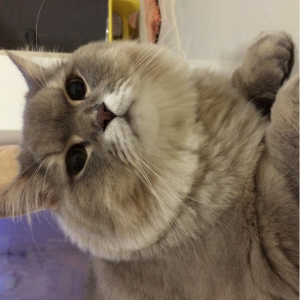

In [12]:
# 4 изображения из 4 полученных матриц
new_img1 = pi.fromarray(main_m1.astype('uint8'))
new_img2 = pi.fromarray(main_m2.astype('uint8'))
new_img3 = pi.fromarray(detail_m1.astype('uint8'))
new_img4 = pi.fromarray(detail_m2.astype('uint8'))
new_img1